# Bundesliga Analyse

In [2]:
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from scipy.stats import chi2
from scipy.stats import chi2_contingency


In [3]:
import pandas as pd

# Path to the Excel file
excel_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.xlsx'  # Update this to your Excel file path

# Read the Excel file
df = pd.read_excel(excel_path)

# Path where you want to save the CSV file
csv_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.csv'  # Update this to your desired CSV file path

# Write the DataFrame to a CSV file
df.to_csv(csv_path, index=False)


## Daten Importieren

In [4]:
file_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.csv'
df = pd.read_csv(file_path)

# Anzeigen der ersten paar Zeilen der Tabelle zur Überprüfung
df.head()

,League,Saison,Spieltag,hometeam_raw,awayteam_raw,final_score_raw,goal_raw,goal_time_raw,extratime_raw
0,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:1,52',no
1,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:0,47',no
2,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,1:0,38',no
3,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,2:0,35',no
4,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,1:0,33',no


In [5]:
df['goal_minute'] = df['goal_time_raw'].str.extract(r'(\d+)').astype(int)

# Analyse der Torverteilung über die Spielzeit in verschiedenen Saisons
goal_distribution = df.groupby(['Saison', 'goal_minute']).size().unstack(fill_value=0)

# Anzeigen der Torverteilung
print(goal_distribution)

goal_minute  1    2    3    4    5    6    7    8    9    10   ...  92   93   \
Saison                                                         ...             
2014/2015      6    2    9    6    3    3    5   11    6    9  ...    0    0   
2015/2016      2    2    4    5    8    4    6    2    9    4  ...    1    0   
2016/2017      1    6    7   12    8   10    3    4    6    6  ...    2    0   
2017/2018      5    5    3    9   10    5    5    6    9    3  ...   10    9   
2018/2019      9    4    7    7    4    5    8    7    7   10  ...    6   17   
2019/2020      8    5    7    8    4   12   10    8   11    8  ...   10   14   
2020/2021      2    5    8    6    8    7   10    6   10   10  ...   12    9   
2021/2022      3    3   11    6   10    8   10    7    8    8  ...   10    9   
2022/2023      4    8    6    9   10   11    7   10    8   10  ...   14   14   

goal_minute  94   95   96   97   98   99   100  102  
Saison                                               
2014/2015  

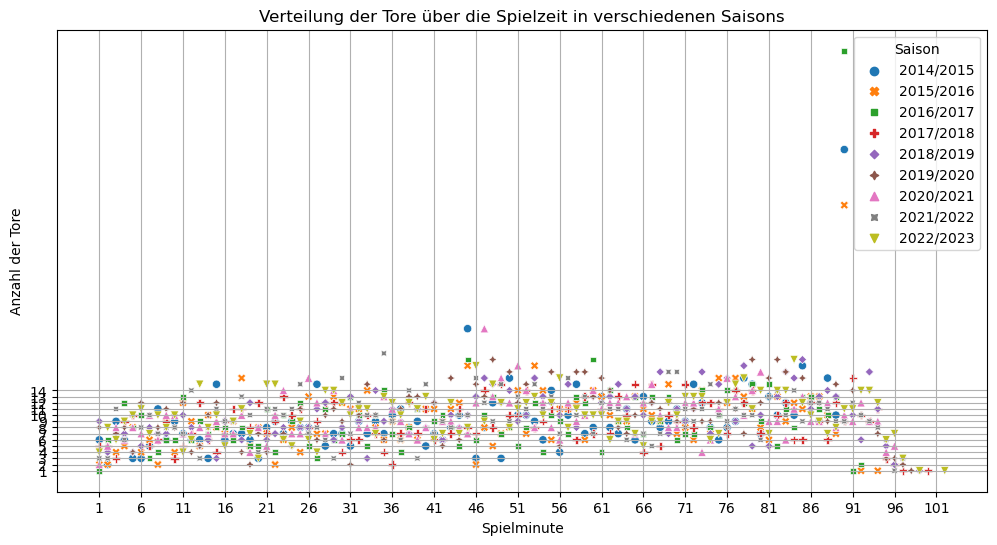

In [6]:
# Konvertierung der Torzeiten in numerische Werte
df['goal_minute'] = df['goal_time_raw'].str.extract(r'(\d+)').astype(int)

# Vorbereitung der Daten für das Scatterplot
scatter_data = df.groupby(['Saison', 'goal_minute']).size().reset_index(name='goals')

# Erstellen des Scatterplots
plt.figure(figsize = (12,6))
sns.scatterplot(data=scatter_data, x='goal_minute', y='goals', hue='Saison', style='Saison')
plt.title('Verteilung der Tore über die Spielzeit in verschiedenen Saisons')
plt.xlabel('Spielminute')
plt.ylabel('Anzahl der Tore')
plt.xticks(range(1, 105, 5))  # Setzen der X-Achsen-Ticks alle 5 Minuten
plt.yticks(range(1, 15, 1))
plt.grid()
plt.show()

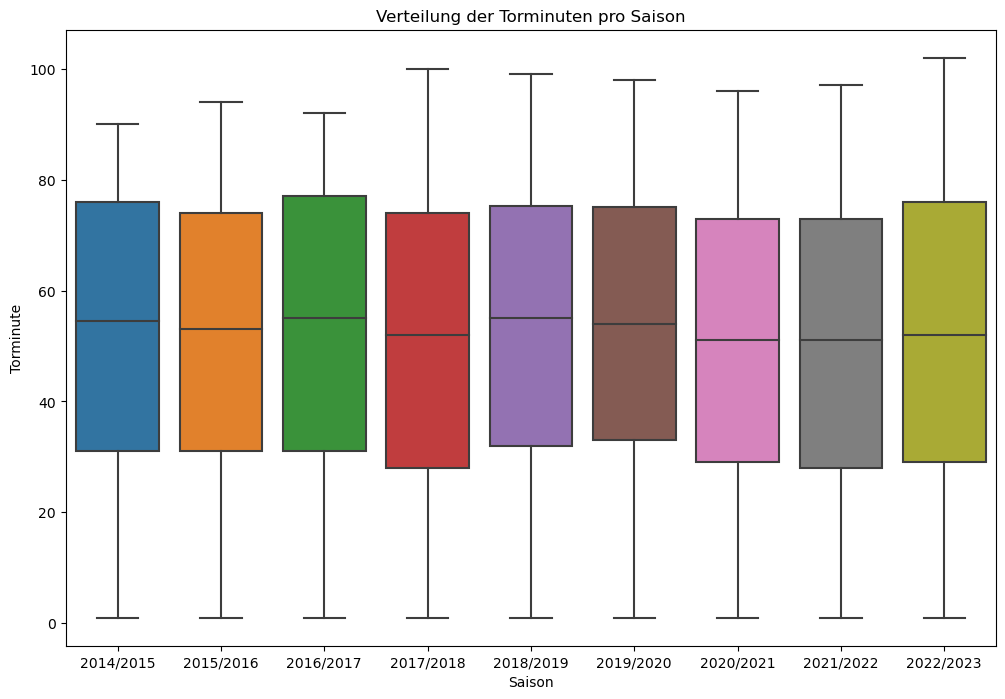

In [7]:

df['goal_minute'] = df['goal_time_raw'].str.extract(r'(\d+)').astype(int)

# Erstellen der Boxplots für jede Saison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Saison', y='goal_minute')
plt.title('Verteilung der Torminuten pro Saison')
plt.xlabel('Saison')
plt.ylabel('Torminute')
plt.show()


([<matplotlib.axis.XTick at 0x14c5b0d10>,
 [Text(1, 0, "47'"),
  Text(6, 0, "70'"),
  Text(11, 0, "90'"),
  Text(16, 0, "37'"),
  Text(21, 0, "88'"),
  Text(26, 0, "31'"),
  Text(31, 0, "41'"),
  Text(36, 0, "5'"),
  Text(41, 0, "57'"),
  Text(46, 0, "82'"),
  Text(51, 0, "46'"),
  Text(56, 0, "79'"),
  Text(61, 0, "63'"),
  Text(66, 0, "17'"),
  Text(71, 0, "75'"),
  Text(76, 0, "36'"),
  Text(81, 0, "24'"),
  Text(86, 0, "14'"),
  Text(91, 0, "94'"),
  Text(96, 0, "100'"),
  Text(101, 0, '')])

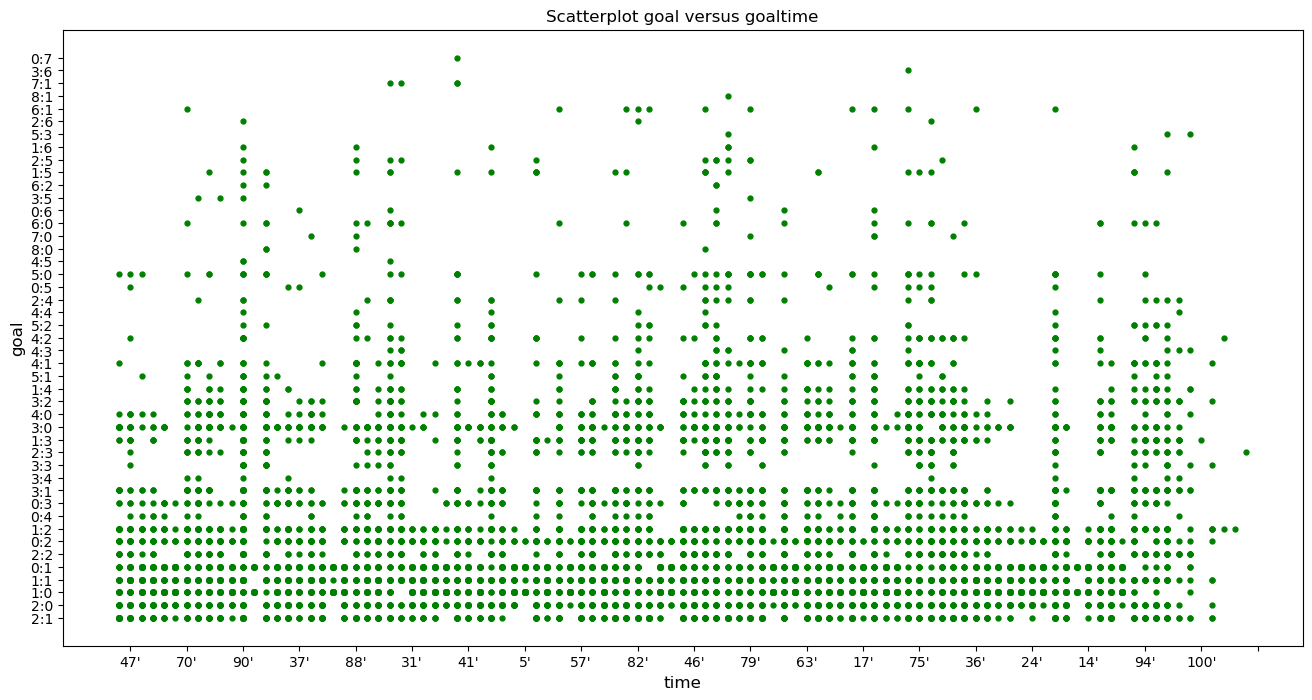

In [8]:
plt.figure(figsize=(16,8))
plt.plot(df['goal_time_raw'], 
         df['goal_raw'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot goal versus goaltime', fontsize=12)
plt.ylabel('goal', fontsize=12)
plt.xlabel('time', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(1,102,5))

In [9]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

NameError: name 'residuals' is not defined

<Figure size 700x400 with 0 Axes>